<a href="https://colab.research.google.com/github/rumorale/Capstone/blob/master/Ayudant%C3%ADas/A5/A5_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 3: Reglas de Asociación y Clustering (I)**

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

   
   

# Sección 1
## ¿Un cafecito?
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión. 

El siguiente archivo contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [7]:
trans_original <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/master/Ayudant%C3%ADas/A5/cafeteria.csv")
head(trans_original)

,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,1,Bread
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:05:34,2,Scandinavian
4,2016-10-30,10:07:57,3,Hot chocolate
5,2016-10-30,10:07:57,3,Jam
6,2016-10-30,10:07:57,3,Cookies


**NOTA:** Observe que el item NONE aparece en reiteradas ocasiones, procure eliminar este registro para seguir con el análisis.

**P1)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos, de los cuales se muestran los primeros 6 registros.

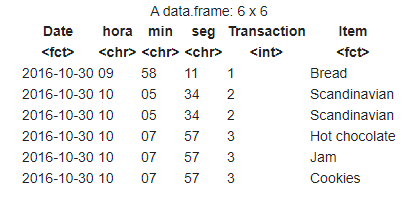

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [8]:
# P1 --------------------------------------------------
# Respuesta
library(dplyr)
library(lubridate)
library(tidyr)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [92]:
# Opcion 1 -  Usando lubridate
trans_original %>% 
mutate( hora = hour(paste(Date, Time)),
        min = minute(paste(Date, Time)),
        seg = second(paste(Date, Time)))


# Opcion 2  -  String

# trans_original %>% 
# mutate( hora = substring(Time,1,2 ),
#         minuto = substring(Time,4,5 ),
#         segundo = substring(Time,7,8)) %>% head()

# Opcion 3  -  separate (tidyr)

# trans_original <- trans_original %>% 
# separate(Time, sep = ":", into = c("hora", "min", "seg")) 
# separate(Date, sep = "-", into = c("anio", "mes", "dia")) %>% 
# mutate(anio = as.numeric(anio))%>%




ERROR: ignored

**P2)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs. 
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [30]:
# P2 --------------------------------------------------
# Respuesta
tabla_resumen <- trans_original %>% 
group_by(hora) %>%
summarise(total_trx = length(unique(Transaction)),
          # total_trx_2 = n_distinct(Transaction), # Opcion 2
          total_items = n(),   
          total_items_unicos = length(unique(Item))) 

tabla_resumen %>% head()

hora,total_trx,total_items,total_items_unicos
<chr>,<int>,<int>,<int>
01,1,1,1
07,16,25,6
08,375,669,43
09,1007,2045,49
10,1267,2763,64
11,1445,3216,66


**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones. 

**a)** ¿Qué horas comprende el horario punta?<br>
**b)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta? 


In [93]:
# P3 --------------------------------------------------
# Respuesta

# a)

# tabla_resumen %>% filter( total_trx	 > 1000)


# b) 
#opcion 1
tabla_resumen %>% filter( total_trx	 > 1000) %>% summarise(promedio_trx = mean(total_trx))
tabla_resumen %>% filter( total_trx	 <= 1000) %>% summarise(promedio_trx = mean(total_trx))

# Opcion 2

tabla_resumen %>% 
# mutate( es_hora_punta = ifelse(total_trx	 > 1000, "si", "no")) %>%
mutate(es_hora_punta = case_when( total_trx	 > 1000 ~ "si",
                                  T  ~ "no")) %>% 
group_by(es_hora_punta) %>% 
summarise(promedio_trx = mean(total_trx))



promedio_trx
<dbl>
1226.5


promedio_trx
<dbl>
181


es_hora_punta,promedio_trx
<chr>,<dbl>
no,181.0
si,1226.5


El horario punta comprende desde las 09:00 hasta las 14:59.

### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P4)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

In [41]:
library(ggplot2)

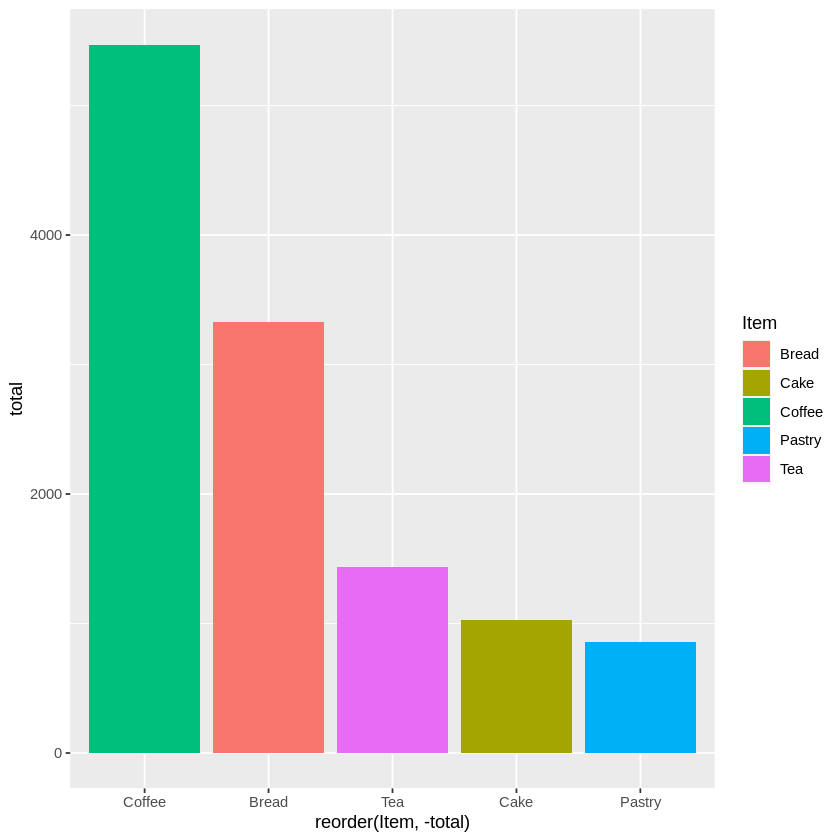

In [94]:
# Respuesta

trans_original %>% 
group_by(Item) %>% 
summarise(total = n()) %>%
# count() opcion 2
arrange(desc(total)) %>% 
head(5) %>%
ggplot() +
aes(x = reorder(Item, -total), y = total, fill = Item)+
geom_bar(stat = "identity")





**P5)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

`summarise()` has grouped output by 'Item'. You can override using the `.groups` argument.



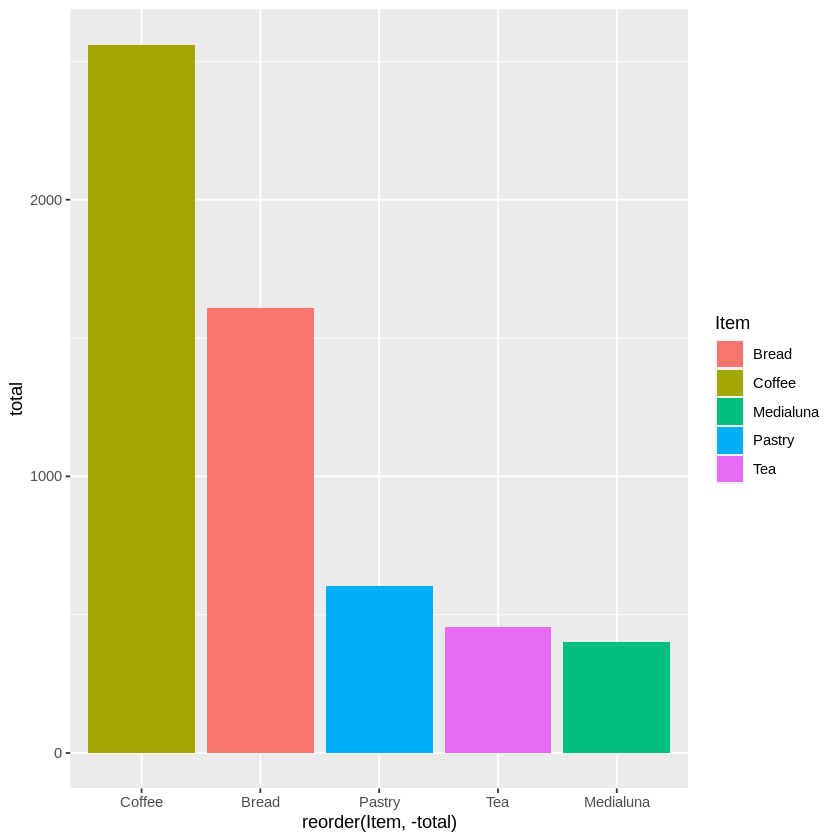

`summarise()` has grouped output by 'Item'. You can override using the `.groups` argument.



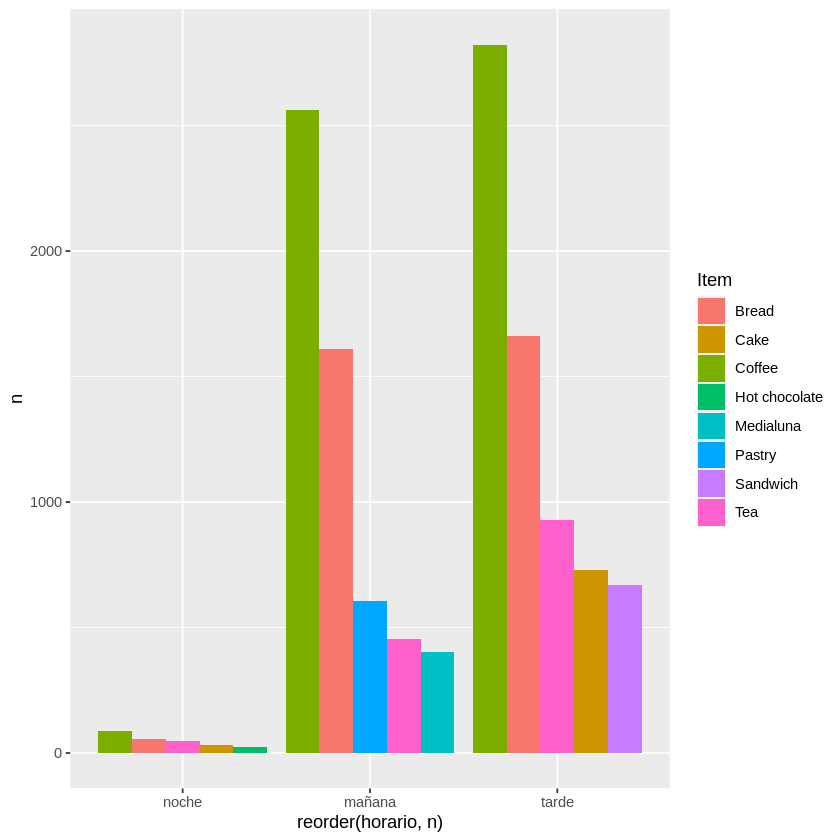

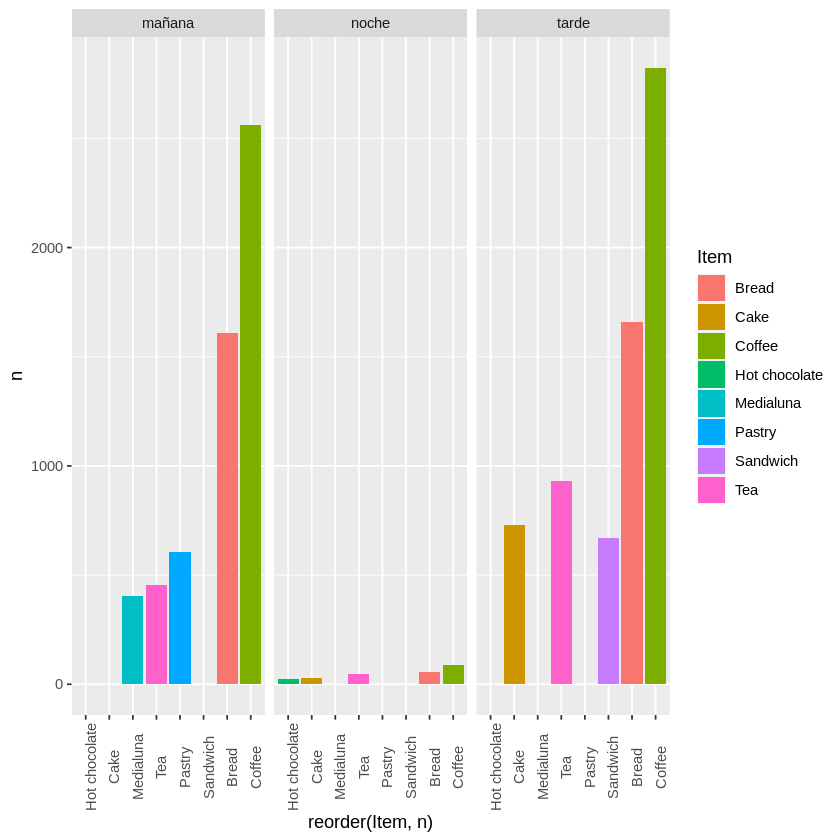

In [104]:
#head(trans_original, 2)

# Opcion 1 -  Repetir esto para los 3 horarios
trans_original %>% 
# mutate(hora = as.numeric(hora)) %>%
filter(as.numeric(hora) >= 7, as.numeric(hora) <= 11) %>%
group_by(Item) %>% 
summarise(total = n()) %>%
# count() opcion 2
arrange(desc(total)) %>% 
head(5) %>%
ggplot() +
aes(x = reorder(Item, -total), y = total, fill = Item)+
geom_bar(stat = "identity")


# Opcion 2

# table(trans_original$hora)

trans_original %>% 
mutate(hora = as.numeric(hora)) %>%
# mutate(horario = ifelse(test = hora >= 7 & hora <= 11, yes = "mañana", no = ifelse(test = hora  >= 12 & hora <= 16, yes = "tarde", no = "noche") )) 
mutate(horario = case_when( hora >= 7 & hora <= 11 ~ "mañana",
                            hora  >= 12 & hora <= 16 ~ "tarde",
                            T ~ "noche")) %>%
group_by(Item, horario) %>%
summarise(n = n()) %>% 
arrange(horario, -n) %>% # desc(n) es equivalente a -n
group_by(horario) %>%
top_n(5, wt = n) %>%
# slice_max(n, n = 5) %>%
ungroup() %>%
ggplot() +
aes(x = reorder(horario, n), y = n, fill = Item, group = -n) +
geom_bar(stat = "identity", position = "dodge") 



trans_original %>% 
mutate(hora = as.numeric(hora)) %>%
# mutate(horario = ifelse(test = hora >= 7 & hora <= 11, yes = "mañana", no = ifelse(test = hora  >= 12 & hora <= 16, yes = "tarde", no = "noche") )) 
mutate(horario = case_when( hora >= 7 & hora <= 11 ~ "mañana",
                            hora  >= 12 & hora <= 16 ~ "tarde",
                            T ~ "noche")) %>%
group_by(Item, horario) %>%
summarise(n = n()) %>% 
arrange(horario, -n) %>% # desc(n) es equivalente a -n
group_by(horario) %>%
top_n(5, wt = n) %>%
# slice_max(n, n = 5) %>%
ungroup() %>%
ggplot() +
aes(x = reorder(Item, n), y = n, fill = Item) +
geom_bar(stat = "identity", position = "dodge") + 
theme(axis.text.x = element_text(angle = 90))+
facet_wrap(~ horario)



### Genereación de reglas

**P6)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P5)**?<br>
**b)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P5)**? <br>
**c)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P5)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [106]:
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [113]:
trans_original %>% head()

,Date,hora,min,seg,Transaction,Item
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09,58,11,1,Bread
2,2016-10-30,10,05,34,2,Scandinavian
3,2016-10-30,10,05,34,2,Scandinavian
4,2016-10-30,10,07,57,3,Hot chocolate
5,2016-10-30,10,07,57,3,Jam
6,2016-10-30,10,07,57,3,Cookies


In [118]:
# trans_original %>% head()
# horario = c("mañana","tarde", "noche")

# for(i in horario){

#   transacciones <- trans_original %>% 
#   mutate(horario = case_when( hora >= 7 & hora <= 11 ~ "mañana",
#                               hora  >= 12 & hora <= 16 ~ "tarde",
#                               T ~ "noche")) %>% 
#                               filter(horario == i)

#   reglas_asociacion <- apriori(data = transacciones, 
#                                       parameter = list(supp = 0.02, conf = 0.1, minlen = 2 ))

#   sort(reglas_asociacion, by = "support") %>% inspect()

# }


transacciones_manana <- trans_original %>% 
mutate(horario = case_when( hora >= 7 & hora <= 11 ~ "mañana",
                            hora  >= 12 & hora <= 16 ~ "tarde",
                            T ~ "noche")) %>% 
                            filter(horario == "mañana")

transacciones_tarde <- trans_original %>% 
mutate(horario = case_when( hora >= 7 & hora <= 11 ~ "mañana",
                            hora  >= 12 & hora <= 16 ~ "tarde",
                            T ~ "noche")) %>% 
                            filter(horario == "tarde") 

transacciones_noche <- trans_original %>% 
mutate(horario = case_when( hora >= 7 & hora <= 11 ~ "mañana",
                            hora  >= 12 & hora <= 16 ~ "tarde",
                            T ~ "noche")) %>% 
                            filter(horario == "noche")

# elemento transactions para horario mañana
transacciones_manana <- transactions( split(transacciones_manana$Item,  transacciones_manana$Transaction) )

# elemento transactions para horario tarde
transacciones_tarde <- transactions( split(transacciones_tarde$Item,  transacciones_tarde$Transaction) )

# elemento transactions para horario noche
transacciones_noche <- transactions( split(transacciones_noche$Item,  transacciones_noche$Transaction) )








Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


In [129]:
# a) ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en P5)?

# reglas_asociacion_manana <- apriori(data = transacciones_manana, 
#                                     parameter = list(supp = 0.02, conf = 0.1, minlen = 2 ))

reglas_asociacion_tarde <- apriori(data = transacciones_tarde, 
                                    parameter = list(supp = 0.02, conf = 0.1, minlen = 2 ),
                                    control = list(verbose = FALSE)
                                    )

reglas_asociacion_noche <- apriori(data = transacciones_noche, 
                                    parameter = list(supp = 0.02, conf = 0.1, minlen = 2 ),
                                    control = list(verbose = FALSE))


# sort(reglas_asociacion_manana, by = "support") %>% inspect()
sort(reglas_asociacion_tarde, by = "support") %>% head(1) %>% inspect()
sort(reglas_asociacion_noche, by = "support") %>% head(1) %>% inspect()

# b) ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en P5)?

# sort(reglas_asociacion_manana, by = "confidence") %>% inspect()
sort(reglas_asociacion_tarde, by = "confidence") %>% head(1) %>% inspect()
sort(reglas_asociacion_noche, by = "confidence") %>% head(1) %>% inspect()

# c) ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en P5)?

# sort(reglas_asociacion_manana, by = "lift") %>% inspect()
sort(reglas_asociacion_tarde, by = "lift") %>% head(1) %>% inspect()
sort(reglas_asociacion_noche, by = "lift") %>% head(1) %>% inspect()


    lhs        rhs      support    confidence coverage lift      count
[1] {Bread} => {Coffee} 0.08898387 0.2943445  0.302312 0.6474321 458  
    lhs        rhs      support    confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.08987226 0.2556781  0.3515055 0.5122911 394  
    lhs         rhs      support    confidence coverage   lift     count
[1] {Pastry} => {Coffee} 0.02525743 0.5579399  0.04526909 1.227229 130  
    lhs        rhs      support    confidence coverage   lift     count
[1] {Toast} => {Coffee} 0.03353102 0.7205882  0.04653285 1.443811 147  
    lhs      rhs    support    confidence coverage  lift     count
[1] {Tea} => {NONE} 0.02137167 0.1273148  0.1678648 1.499518 110  
    lhs        rhs      support    confidence coverage   lift     count
[1] {Toast} => {Coffee} 0.03353102 0.7205882  0.04653285 1.443811 147  


In [127]:
# sort(reglas_asociacion_tarde, by = "support") %>% inspect()

# sort(reglas_asociacion_noche, by = "support") %>% inspect()

# sort(reglas_asociacion_noche, by = "confidence") %>% inspect()

sort(reglas_asociacion_noche, by = "lift") %>% inspect()

     lhs                rhs         support    confidence coverage   lift     
[1]  {Toast}         => {Coffee}    0.03353102 0.7205882  0.04653285 1.4438112
[2]  {NONE}          => {Coffee}    0.04493613 0.6234177  0.07208029 1.2491148
[3]  {Cookies}       => {Coffee}    0.02874088 0.5860465  0.04904197 1.1742358
[4]  {Medialuna}     => {Coffee}    0.05269161 0.5848101  0.09010036 1.1717585
[5]  {Coffee}        => {Medialuna} 0.05269161 0.1055759  0.49908759 1.1717585
[6]  {Coffee}        => {Pastry}    0.07299270 0.1462523  0.49908759 1.1016667
[7]  {Pastry}        => {Coffee}    0.07299270 0.5498282  0.13275547 1.1016667
[8]  {Cake}          => {Coffee}    0.03467153 0.5296167  0.06546533 1.0611699
[9]  {Hot chocolate} => {Coffee}    0.02874088 0.5271967  0.05451642 1.0563209
[10] {Pastry}        => {Bread}     0.04470803 0.3367698  0.13275547 0.9580783
[11] {Bread}         => {Pastry}    0.04470803 0.1271901  0.35150547 0.9580783
[12] {NONE}          => {Bread}     0.02372263 0.329

**P7)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente.

**a)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.


In [132]:
# a)

reglas_asociacion_tarde <- apriori(data = transacciones_tarde, 
                                    parameter = list(supp = 0.02, conf = 0.1, minlen = 2 ),
                                    control = list(verbose = FALSE),
                                    appearance = list(lhs = "Coffee" ))

reglas_asociacion_noche <- apriori(data = transacciones_noche, 
                                    parameter = list(supp = 0.02, conf = 0.1, minlen = 2 ),
                                    control = list(verbose = FALSE),
                                    appearance = list(lhs = "Coffee" ))                                    

sort(reglas_asociacion_tarde, by = "lift") %>% inspect()

sort(reglas_asociacion_tarde, by = "lift") %>% inspect()

    lhs         rhs        support    confidence coverage  lift      count
[1] {Coffee} => {Sandwich} 0.06158928 0.1354701  0.4546338 1.1818043 317  
[2] {Coffee} => {Cake}     0.07110938 0.1564103  0.4546338 1.1566718 366  
[3] {Coffee} => {Tea}      0.05653779 0.1243590  0.4546338 0.7408283 291  
[4] {Coffee} => {Bread}    0.08898387 0.1957265  0.4546338 0.6474321 458  
    lhs         rhs         support    confidence coverage  lift      count
[1] {Coffee} => {Medialuna} 0.05269161 0.1055759  0.4990876 1.1717585 231  
[2] {Coffee} => {Pastry}    0.07299270 0.1462523  0.4990876 1.1016667 320  
[3] {Coffee} => {Bread}     0.08987226 0.1800731  0.4990876 0.5122911 394  


**Respuesta** 
**b)**
Esta es una pregunta abierta, y las opciones de respuestas pueden ser varias. A modo de ejemplo, basándose en el listado anterior, algunas opciones serían:

   1. Optar por la asociación con mayor lift,dado que se asume que todas las reglas ya cumplen el mínimo deseable de support y confidence <br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich} 
       * Horario 3: {Coffee} =&gt; {Cake}
   * Optar por aquellas relaciones con alto lift, pero que a la vez no se encuentren dentro de las más frecuentas (pregunta **P3.4.a** asumiendo que las relaciones frecuentes no es necesario potenciarlas aun más (todo dependerá del negocio):<br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich} 
       * Horario 3: {Coffee} =&gt; {Alfajores}
       

# Sección 2
## En busca de la felicidad

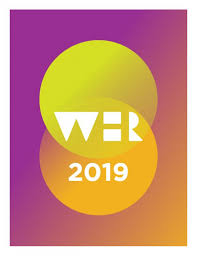

El Informe Mundial sobre la Felicidad es una encuesta histórica sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El World Happiness 2017, que clasifica a 155 países por sus niveles de felicidad, fue lanzado en las Naciones Unidas en un evento que celebra el Día Internacional de la Felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones del bienestar se pueden utilizar de manera efectiva para evaluar el progreso de las naciones. Los informes revisan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales de la felicidad.

Para mayor información sobre este informe, refiérase al siguiente link [https://worldhappiness.report/](https://worldhappiness.report/).


## Datos

Usted deberá analizar 6 indicadores para los 156 países países considerados para el reporte del año 2019. Cada indicador muestra la contribución al nivel de felicidad de cada país. Para más información considere la referencia [https://www.kaggle.com/unsdsn/world-happiness](https://www.kaggle.com/unsdsn/world-happiness).

Sin embargo en esta oportunidad, se dejará abierto el tipo de análisis a realizar, aunque con algunas pequeñas directrices a modo de poder ir aplicando algunos de los temas vistos en clases.



In [109]:
data <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/master/Ayudant%C3%ADas/A5/whr_2019.csv")
head(data)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


Para efectos de la exploración de estos datos, considere las siguientes preguntas como guía:

  1. ¿Existe alguna correlación entre las variables de interés? 
  
  Apoye su exploración mediante gráficos de dispersión y de correlación.
  2.  ¿Cómo es la distribución del Score de felicidad? Considere algunos etadísticos descriptivos para este análisis y algunas visualizaciones (histogramas y boxplots por ejemplo).
  3. ¿Cual de los 6 indicadores contribuye en mayor medida al Score de felicidad?
  4. Analice cada uno de los indicadores y mediante el criterio del  rango inter-cuartílico identifique aquellos países con indicadores atípicos.
  5. Mediante el algoritmo k-means, genere una clusterización considerando los 6 indicadores de interés. Determine la cantidad de clusters a generar y describa los segmentos obtenidos. ¿Cómo se relacionan estos segmentos con el Score de felicidad?
  6. Apele a su creatividad e indique algún otro aspecto, hecho o hallazgo que le llame la atención a raiz de los datos y de las herramientas de análisis disponibles hasta el momento. 

